# Introduccion a Filtros

Un filtro está definido por un arreglo de datos que se aplica a cada píxel y sus vecinos dentro de una imagen. En la mayoría de las aplicaciones, el centro del arreglo está alineado con el píxel actual, y es un cuadrado con un número impar (3, 5, 7, etc.) de elementos en cada dimensión.




![](media/filter.png)

Utilizado para el procesamiento de imágenes:
* Reducción de ruido
* Enfatización
* Refinado 
* Dilatación de contornos
* Detección de objetos 
* Detección de patrones
* Ajustes de la resolución


## Filtros pasa Bajas
Difuminadores o suavizantes que capturan los patrones más importantes de la imagen mientras reducen la presencia de ruido en las imágenes.

#### Filtro Promedio:
Remplazar cada valor de píxel por el valor promedio de éste y sus vecinos, teniendo como consecuencia la eliminación de valores que no son representativos de sus alrededores.

![Segmentlocal](med3x3.gif "median")


In [1]:
#importar librerias 
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
#Elegir la imagen a importar
img = cv2.imread('soytec_noise.jpg')
#Convierte formato de colores
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#Aplica filtro promedio
promedio = cv2.blur(img,(5,5))
#Prepara la imagen original
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
#Prepara la imagen con filtro
plt.subplot(122),plt.imshow(promedio),plt.title('Difuminada')
plt.xticks([]), plt.yticks([])
#Muestra las imagenes
plt.show()

ImportError: /opt/ros/kinetic/lib/python2.7/dist-packages/cv2.so: undefined symbol: PyCObject_Type

 #### Filtro Mediano:
Toma todos los píxeles debajo del área del arreglo, los ordena de menor a mayor y reemplaza el píxel por la mediana de los valores considerados. Es muy efectivo para eliminar ruido sal y pimienta, sin embargo, es muy poco eficiente. 

![title](median1.png)


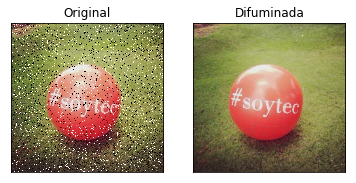

In [17]:
img = cv2.imread('soytec_noise.jpg')
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
median = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Difuminada')
plt.xticks([]), plt.yticks([])
plt.show()

#### Filtro Gaussiano:
Una media ponderada de los pixeles de un mismo vecindario, con un peso mayor hacia los que se encuentran en el centro. En contraste con la ponderación uniforme del filtro promedio, éste método de filtrado tiene efectos menos significativos en la difuminación de la imagen y por lo tanto, puede llegar a preservar de manera más correcta los bordes, incluso mejor que un filtro mediano del mismo tamaño


![](media/gaussian_graph.png)


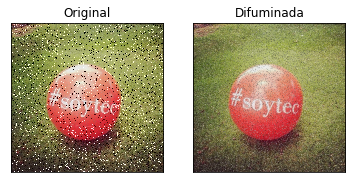

In [19]:
#importar librerias 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('soytec_noise.jpg')
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Difuminada')
plt.xticks([]), plt.yticks([])
plt.show()

## Filtros pasa-altas
Acentuar y retener la información de valores altos en las imágenes y reducir la información valores bajos. Este tipo de filtros son comúnmente utilizados para la detección de bordes en las imágenes. 

#### Filtro Laplaciano: 
La principal ventaja que tiene el filtro laplaciano es que es capaz de realzar los bordes en cualquier dirección, sin embargo, es altamente sensible al ruido.


In [2]:
img = cv2.imread('tec7.png')
#img = cv2.imread('boat2.png')
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#img = cv2.GaussianBlur(img,(3,3),0)
laplacian = cv2.Laplacian(img, cv2.CV_64F,ksize=21)
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

NameError: name 'cv2' is not defined

#### Filtro Sobel: 
Es mas resistente al ruido, uno de ellos se enfoca en encontrar los cambios horizontales, mientras que el otro se enfoca en encontrar los cambios verticales.

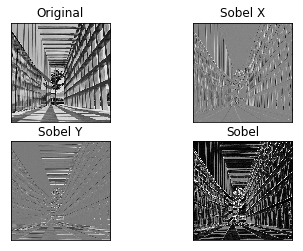

In [90]:
#img = cv2.imread('boat2.png')
img = cv2.imread('tec7.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3) 
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(grad,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.show()

#### Filtro Canny:
El operador de Canny es un algoritmo multi-etapa ampliamente utilizado para la detección de bordes en las imágenes. Este algoritmo busca cumplir tres aspectos; buena detección de bordes, detección precisa con respecto a los bordes reales y respuesta mínima, es decir, el ruido no debe crear bordes falsos

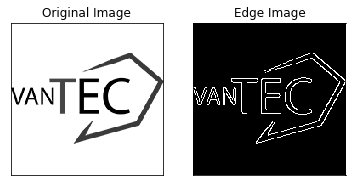

In [113]:
img = cv2.imread('index.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Filtros morfológicos 
Las transformaciones morfológicas son algunas operaciones simples basadas en la forma de la imagen. Normalmente se realiza en imágenes binarias. 

#### Filtro de dilatación:
El objetivo del operador de dilatación es estrechar de manera gradual las regiones del primer plano en imágenes binarizadas y ensanchar regiones que presentan agujeros. Sirve para quitar ruido blanco.

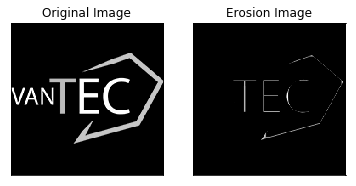

In [114]:
img = cv2.imread('index.png',0)
img  = cv2.bitwise_not(img)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion,cmap = 'gray')
plt.title('Erosion Image'), plt.xticks([]), plt.yticks([])
plt.show()

#### Filtro de dilatación: 
Aumenta la región blanca en la imagen o aumenta el tamaño del objeto en primer plano. Se usa mucho despues de la erosion para regresar imagenes a su forma origial ya sin ruido. 

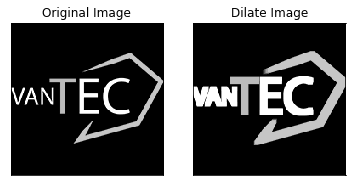

In [115]:
img = cv2.imread('index.png',0)
img  = cv2.bitwise_not(img)
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation,cmap = 'gray')
plt.title('Dilate Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Filtos de apertura y cerradura 
Estas operaciones morfológicas las utilizamos comúnmente para la eliminación de ruido y simplificación de formas, entre otras cosas.

#### Filtro Apertura: 
La operación de apertura es el resultado de aplicar una erosión y después una dilatación, nos servirá para eliminar ruido que se encuentre fuera de la estructura.


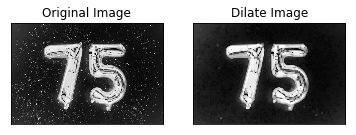

In [124]:
img = cv2.imread('tec.png',0)
img  = cv2.bitwise_not(img)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel,iterations = 1)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening,cmap = 'gray')
plt.title('Dilate Image'), plt.xticks([]), plt.yticks([])
plt.show()

#### Filtro de Cerradura:
Dilatación seguida de Erosion. Es útil para cerrar pequeños agujeros dentro de los objetos de primer plano, o pequeños puntos negros en el objeto.

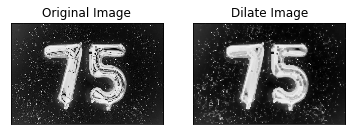

In [117]:
img = cv2.imread('tec.png',0)
img  = cv2.bitwise_not(img)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing,cmap = 'gray')
plt.title('Dilate Image'), plt.xticks([]), plt.yticks([])
plt.show()

#### Filtro Gradiente: 
Es la diferencia entre la dilatación y la erosión de una imagen.

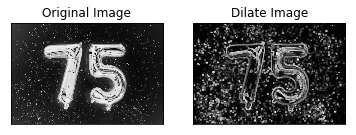

In [118]:
img = cv2.imread('tec.png',0)
img  = cv2.bitwise_not(img)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient,cmap = 'gray')
plt.title('Dilate Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Referencias

I,Navarro, 2018. Filtrado de  imágenes. Itesm. 28 de Septiembre de 2018.

Image Processing in OpenCV. 28 de Septiembre de 2018, de sitio web: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html


